## Fall 2023: CHEME 5660 Take Home Prelim 2 (THP2)
You are choosing to invest $V_{B}$ USD in one of two possible investments:
<div>
    <center>
        <img src="figs/CHEME-5660-L1c-AbstractAssets-Fall-2023.png" width="680"/>
    </center>
</div>

* __Investment A__: Purchase a `52-Week` Treasury Bill (`T-bill`) at auction for $V_{B}$ USD, with an annualized investment rate of $\bar{r}$ = `5.488%`, and semi-annual compounding. At the term of the `T-bill` we recieve the face (par) value of the bill $V_{P}=$ 100 USD.
* __Investment B__: Invest $V_{B}$ USD in $n_{o}$ shares of [SPYD](https://finance.yahoo.com/quote/SPYD/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANiorcaltDNUCtp01qZd0GAF86DY9ajVMBq8fpt9wPQJKA2M7XgMOWvsfeDsrJxSlpMUKrWYfPDaC9XhnhQ2uCQnfWqvJIdpkimycwOTPv_QySkAzvnIju10jMrqSK7KdsX4ATgr0VtRlF6up-NuK5jDvJx1v2NSlxu1RGQTCAxR), an [ETF](https://www.investopedia.com/terms/e/etf.asp) that provides investment results that correspond to the total return of the S&P 500 High Dividend Index. The share price of [SPYD](https://finance.yahoo.com/quote/SPYD/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANiorcaltDNUCtp01qZd0GAF86DY9ajVMBq8fpt9wPQJKA2M7XgMOWvsfeDsrJxSlpMUKrWYfPDaC9XhnhQ2uCQnfWqvJIdpkimycwOTPv_QySkAzvnIju10jMrqSK7KdsX4ATgr0VtRlF6up-NuK5jDvJx1v2NSlxu1RGQTCAxR) at the time of purchase is $S_{\circ}$ = 34.57 USD/share. You hold the [SPYD](https://finance.yahoo.com/quote/SPYD/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANiorcaltDNUCtp01qZd0GAF86DY9ajVMBq8fpt9wPQJKA2M7XgMOWvsfeDsrJxSlpMUKrWYfPDaC9XhnhQ2uCQnfWqvJIdpkimycwOTPv_QySkAzvnIju10jMrqSK7KdsX4ATgr0VtRlF6up-NuK5jDvJx1v2NSlxu1RGQTCAxR) shares for `52-Weeks`, collecting quarterly dividend payments of $\text{1.78}\times{n_{\circ}}$ USD during the term. At the end the term, you collect a final dividend payment and liquidate your $n_{\circ}$ shares at $S_{T}$ USD/share. 

Using the Net Present Value (NPV) as your decision rule, on a risk-neutral basis, which investment should you choose? 

### Assumptions
* Assume the annualized risk-free rate equals the investment rate of the `T-bill`, $\bar{r}$ = `5.488%`.
* Assume the `T-bill` uses a discrete discounting model with $m$ = 2 compounding events per-year 
* Assume the `SPYD` shares use continuous discounting

### Setup

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
   Installed ArrayInterface ─ v7.5.0
    Updating `C:\Users\Lillian K\OneDrive\Documents\CHEME 5660\THPrelim2\CHEME5660_Prelim2_yk522\Project.toml`
  [4119e0bf] ~ VLQuantitativeFinancePackage v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main` ⇒ v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main`
    Updating `C:\Users\Lillian K\OneDrive\Documents\CHEME 5660\THPrelim2\CHEME5660_Prelim2_yk522\Manifest.toml`
  [4119e0bf] ~ VLQuantitativeFinancePackage v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main` ⇒ v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main`
Precompiling project...
  ✓ ArrayInterface
  ✓ ArrayInterface → ArrayInterfaceStaticArraysCoreExt
  ✓ FiniteDiff
  ✓ Roots
  ✓ FiniteDiff → FiniteDiffStaticArraysExt
  ✓ NLSolversBase
  ✓ Roots 

### Constants
Here we set some constants that will be used in the evaluation of `Investment A` and `Investment B`:

In [2]:
# Parameters for Investment A
T = "52-Week" |> securityterm; # duration of investment A (in years)
r̄ = 0.05488;  # investment rate (annualized risk-free rate)
dcm = DiscreteCompoundingModel(); # discrete discount/compounding model
Vₚ = 100.0; # par value of the T-bill
n = 2; # number of compounding periods per year for the T-bill
V̄B = 94.757389; # price of T-bill observed at auction

# Parameters for Investment B
Sₒ = 34.57; # initial share price of SPYD
σ̂ = 0.1818; # estimated volatility for SPYD
Δt = (1.0/252.0); # time-step for SPYD 
number_of_samples = 25000; # number of random samples for the SPYD distribution
dividend_per_share = 1.78; # dividend amount per share of SPYD

## Investment A: Treasury Bill with a `52-Week` term to maturity
Compute the price $V_{B}$ USD of the `T-bill`, save this value in the `VB` variable. First, build (and populate) an instance of the `MyUSTreasuryZeroCouponBondModel` using the problem parameters, save this in the `tbill_model` variable.
* Pass in a value for the `par` parameter, the `rate` parameter, the `n` parameter and the duration parameter `T` into the `build(...)` method

In [3]:
tbill_model = build(MyUSTreasuryZeroCouponBondModel, (
    par = Vₚ, rate = r̄, n = n, T = T
)) |> dcm;

Next, get the computed price from the `tbill_model` variable by accessing the `price` field, save this value in the `VB` variable:

In [4]:
VB = tbill_model.price;

#### a) Check your computed price for the `T-bill`
The price reported at the Treasury auction on `10/03/23` for this `T-bill` was $\bar{V}_{B}$ = 94.757389 `USD`. Let's compute the percentange differece between our computed price and the price observed at auction:

$$
\epsilon = \left(\frac{V_{B} - \bar{V}_{B}}{\bar{V}_{B}}\right)\times\text{100}
$$

In [5]:
ϵ = ((VB - V̄B)/V̄B)*100;

If $\text{abs}\left(\epsilon\right)\leq~0.01$, we can continue. Use the `@assert ...` macro to check the error condition on the computed Treasury bill prices:

In [6]:
# Test: are the prices "close"?
@assert abs(ϵ) ≤ 0.01; # if this fails (diff larger that 0.01%), an AssertionError will be thrown. Otherwise, no error is thrown

#### b) Compute the Net Present Value (NPV) of `Investment A`
Finally, we can compute the NPV for `Investment A`,  save this value in the `NPV_A` variable:

In [7]:
NPV_A = 0.0; 

## Investment B: Purchase shares of `SPYD`, hold for `52-Weeks`
The challenge to computing the Net Present Value (NPV) _today_ for the `SPYD` shares in `Investment B` is the estimation of the final share price of `SPYD` at the end of the `52-Week` investment period, denoted as $S_{T}$. Toward this challenge, let's construct a Geometric Brownian Motion (GBM) model to predict the future share price at the end of the `Investment B` period:
* We'll estimate the drift parameter $\mu$ in the GBM model using `2023` price data
* However, we'll use the option's markets estimate for the volatility parameter $\sigma$ = 0.1818 in the GBM model

### Background
[Geometric Brownian motion (GBM)](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) is a continuous-time stochastic process model in which the random variable $S(t)$, e.g., the share price of `XYZ` is described by a deterministic drift corrupted by a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process):

$$\frac{dS}{S} = {\mu}dt + \sigma{dW}$$

The constant $\mu$ denotes a drift parameter, $\sigma$ indicates a volatility parameter, and $dW$ represents the output of a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process).  Using [Ito's lemma](https://en.wikipedia.org/wiki/Itô%27s_lemma), we can formulate an analytical solution to the GBM equation:

$$S(t) = S_{\circ}\exp\Biggl[\left(\mu-\frac{\sigma^{2}}{2}\right)\left(t - t_{\circ}\right) + (\sigma\sqrt{t-t_{\circ}})\cdot{Z_{t}(0,1)}\Biggr]$$

where $S_{\circ}$ denotes the share price at $t_{\circ}$, and $Z_{t}(0,1)$ denotes a [standard normal random variable](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution) at time $t$. For Geometric Brownian Motion (GBM) analytical expressions are available for both the expected value and the variance of the share price:

$$
\begin{eqnarray*}
\mathbb{E}\left(S_{t}\right) & = & S_{o}\exp\left(\mu\cdot\Delta{t}\right) \\
\text{Var}\left(S_{t}\right) & = & S_{\circ}^{2}e^{2\mu\cdot\Delta{t}}\left[e^{\sigma^{2}{\Delta{t}}} - 1\right]
\end{eqnarray*}
$$

where $\Delta{t} = t-t_{o}$ and $S_{o}$ denotes the share price at $t=t_{o}$. 

#### Prerequisites
Before we begin modeling the share price of `SPYD`, let's load the Year-to-Date (YTD) `OHLC` daily price dataset for `SPYD` (data from `01/03/23` to `10/13/23`) by calling the `MySPYDDataSet()` function. This function returns the price data as a `DataFrame`. Save this data in the `firm_data` variable:

In [8]:
firm_data = MySPYDDataSet();

#### a) Estimate the drift parameter $\mu$
To estimate the drift parameter, consider the deterministic component of the GBM analytical solution, i.e., the solution without random noise $\sigma = 0$ or:

$$
S(t) = S_{\circ}\cdot\exp(\mu\cdot\Delta{t})
$$

Use the `ln`-transformed version of the deterministic component of the GBM solution to form an `overdetermined` system of Linear Algebraic Equations (LAEs), which can be solved for the unknown parameter vector $\theta$.

__Strategy__:
Let $\mathbf{A}$ denote a $\mathcal{S}\times{2}$ matrix, where each row corresponds to a time value. The first column of $\mathbf{A}$ is all 1's while the second column holds the $(t_{k}-t_{\circ})$ values. Further, let $\mathbf{Y}$ denote the `ln` of the price values of `SPYD` (in the same order as the $\mathbf{A}$ matrix). Then, the y-intercept ($\ln\, S_{\circ}$) and slope (drift parameter) can be estimated by solving the `overdetermined` system of equations:

$$\mathbf{A}\mathbf{\theta} + \mathbf{\epsilon} = \mathbf{Y}$$

where $\mathbf{\theta}$ denotes the vector of unknown parameters. This system can be solved as:

$$\mathbf{\theta} = (\mathbf{A}^{T}\mathbf{A})^{-1}\mathbf{A}^{T}\mathbf{Y} - (\mathbf{A}^{T}\mathbf{A})^{-1}\mathbf{A}^{T}\mathbf{\epsilon}$$

where $\mathbf{A}^{T}$ denotes the transpose of the matrix $\mathbf{A}$, and $(\mathbf{A}^{T}\mathbf{A})^{-1}$ denotes the inverse of the square matrix product $\mathbf{A}^{T}\mathbf{A}$. Let's neglect modeling the residuals, i.e., set $\mathbf{\epsilon} = 0$ and consider only the mean (expected) solution.

In [9]:
number_of_trading_days = nrow(firm_data);
all_range = range(1,stop=number_of_trading_days,step=1) |> collect;
T_all = all_range*Δt .- Δt;
    
A = [ones(number_of_trading_days) T_all];
Y = log.(firm_data[!,:volume_weighted_average_price]);

# Solve the normal equations -
θ = inv(transpose(A)*A)*transpose(A)*Y;

The second element of the $\theta$-array is the estimated drift parameter value $\hat{\mu}$

In [10]:
μ̂ = θ[2];

#### b) Estimate the final share price $S_{T}$ distribution
Now that we have values for the drift and volatility parameters let's estimate the distribution of possible final share prices for `SPYD` by directly sampling the GBM analytical solution. Then, we'll compare the samples to a `Normal` distribution constructed from the analytical expected value and variance expressions.

First, create an instance of the `MyGeometricBrownianMotionEquityModel` using the `build(...)` method, and pass in your estimates of the drift `μ` and volatility `σ` parameters as arguments in the `build(...)` method. Save the GBM model in the `gbm_model` variable:

In [11]:
gbm_model = build(MyGeometricBrownianMotionEquityModel, (
            μ = μ̂, σ = σ̂ ));

Next, sample the `gbm_model` using the `sample(...)` function. Set the initial share price to $S_{o}$ (specified in `constants`), the initial time $T_{1}$ = 0.0, the final time $T_{2}$ = 1.0, and the `number_of_paths` equal to the `number_of_samples` (specified in `constants`). Save the samples in the `X` array:

In [12]:
T₁ = 0.0;
T₂ = (252)*Δt
X = sample(gbm_model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt), 
    number_of_paths = number_of_samples);

Now that we have the sample array  `X`, construct an analytical version of the potential share price distribution, where we assume the $S_{T}$ values are [Normally distributed](https://en.wikipedia.org/wiki/Normal_distribution). First, compute the `expectation` and `variance` arrays using the `𝔼(...)` and `Var` functions:

In [13]:
expectation = 𝔼(gbm_model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));
variance = Var(gbm_model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));

Next, build a `Normal` distribution from the analytical values for the expectation and variance of the share price $S_{T}$, and save this in the `d` variable:

In [14]:
d = Normal(expectation[end], sqrt(variance[end]));

Now, plot the `X` samples, and values from the `d` distribution:

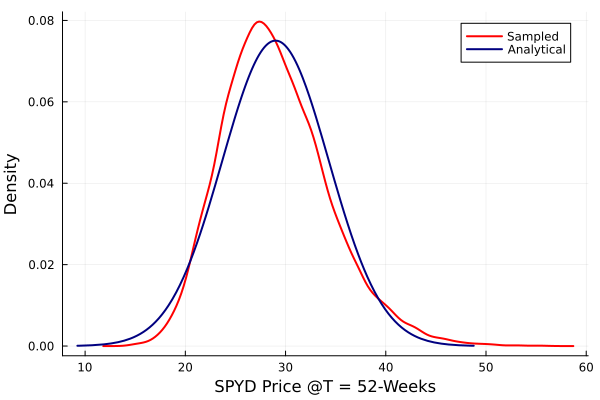

In [15]:
density(X[end,2:end], normalize=true, xlabel="SPYD Price @T = 52-Weeks", 
    ylabel="Density", label="Sampled", c=:red,lw=2)
plot!(d, label="Analytical", c=:navyblue,lw=2)

#### Test for Normality
The plots of $X$ and `d` look similar but not the same. We have assumed that $S_{T}$ can be modeled as a `Normal` distribution initialized from the expected value and variance of the analytical GBM solutions. __Is this a reasonable assumption?__ 

One approach to answering this question is to perform a one-sample [Anderson–Darling test](https://en.wikipedia.org/wiki/Anderson–Darling_test) of the `null hypothesis` that the data in $X$ is drawn from the distribution `d` against the alternative hypothesis that the sample is not drawn from distribution `d`.

* If we `reject` the `null hypothesis`, i.e., $X$ and `d` are from different distributions, we'll use the `X` values directly in subsequent calculations. Otherwise, we'll use the `d` distribution.

In [ ]:
OneSampleADTest(X[end,2:end],d)

#### c) Compute the Net Present Value (NPV) of `Investment B` by sampling the $S_{T}$ distribution
For `Investment B`, we purchase $n_{o}$ shares now (for $V_{B}$ USD), collect the dividend parameters every quarter, and then sell all $n_{o}$ at the end of the `52-Week` investment period for $S_{T}$ USD/share. Let $C = \dot{D}\times{n_{\circ}}$ USD denote the _dividend payment_ (quarterly), where the dividend rate for `SPYD` is $\dot{D}$ = 1.78 USD/share. The NPV for `Investment B` is given by:

$$
\text{NPV}_{B} = -V_{B} + C\cdot\sum_{i=1}^{3}\mathcal{D}^{-1}(\bar{r},t_{i}) + \mathcal{D}^{-1}(\bar{r},1)\cdot\left(C + n_{o}\times{S}_{T}\right)
$$

where $\mathcal{D}(\bar{r},t_{j})$ denotes the _continuous_ discount model between time `0` and $t_{j}$, where time is demarcated in units of quarters, i.e., `0.25 year`. Thus, $t_{1} = 0.25,\dotsc, t_{4} = 1$. Let's begin by building a continuous discounting function:

In [ ]:
𝒟(r,t) = exp(r*t); # specify continuous discount factor function

Now, compute the number of shares we purchased at the start of `Investment B` by investing $V_{B}$ USD in `SPYD`. Save the number of `SPYD` shares purchased in the $n_{\circ}$ variable:

In [ ]:
nₒ = VB/Sₒ

Next, let's compute `number_of_samples` possible futures. Suppose in each possible future, we draw a sample from either the `Normal` share price distribution model `d` or the sample array `X`  and compute a value for $S_{T}$. We repeat this procedure for each possible future. 

* If we rejected the `null hypothesis` above, then we'll use the prices in the `X` array. 
* However, if we did not reject the `null hypothesis`, we’ll generate samples by sampling the `Normal` distribution, i.e. using the `rand(d,number)` function.

In either case, save the $S_{T}$ price samples in the `samples` variable:

In [ ]:
samples = X[end,2:end];

Using nested ‘ for ‘ loops, compute the cash flow associated with `Investment B` for each possible future. 
* The outer `for` loop, over the index `i`, will select a sample (an instance of a potential future), while the inner `for` loop, over the index `j`, loops over the cash events for `Investment B`. 

Let's begin by specifying the number of quarters that we expect cash events to occur and save this value in the `number_of_events` variable:

In [ ]:
number_of_quarters = 4; # number of quarters

Please fill in any missing items in the simulation logic:

In [ ]:
possible_cashflows_array = Array{Dict{Int64,Float64},1}();
for i ∈ 1:number_of_samples

    Tⱼ = 0.0;
    cashflow_dictionary = Dict{Int64,Float64}(); # holds cash flow for a particular future
    cashflow_dictionary[0] = -VB; 
    for j ∈ 1:number_of_events
        Tⱼ = Tⱼ + 0.25;

        if (j == 4)
            future_share_price = samples[i];
            cashflow_dictionary[j] = (1/𝒟(r̄,Tⱼ))*(dividend_per_share*nₒ) + (1/𝒟(r̄,Tⱼ))*(future_share_price*nₒ)
        else
            cashflow_dictionary[j] = (1/𝒟(r̄,Tⱼ))*(dividend_per_share*nₒ)
        end 
    end
    
    push!(possible_cashflows_array, cashflow_dictionary);
end

Finally, we can compute the NPV values for each possible future, and store these values in the `NPV_array_B` variable:

In [ ]:
NPV_array_B = Array{Float64,1}();
for i ∈ eachindex(possible_cashflows_array)
    cashflow_dictionary = possible_cashflows_array[i];

    npv_value = 0.0;
    for j ∈ 0:number_of_events
        npv_value += cashflow_dictionary[j];
    end
    
    push!(NPV_array_B, npv_value)
end

In [ ]:
density(NPV_array_B, normalize=true, xlabel="NPV Investment B", 
    ylabel="Density", label="Normal", c=:red, lw=2)

#### Confidence Interval for NPV value for `Investment B`
We have a distribution of NPV values for `Investment B` because we don't know the final share price exactly. Thus, let's compute the `99% confidence` estimate of the mean NPV value for `Investment B`, and use this in our decision process:

$$
\mu \pm z\left(\frac{\sigma}{\sqrt{N}}\right)
$$

where $\mu$ denotes the `mean` of the NPV, $\sigma$ denotes the `standard deviation` of the NPV, $z$ denotes the `z-score`, where `z = 2.576` for the `99%-CI`, and `N` denotes the `number_of_samples`. The `99%-CI` says we are `99%` confident that the _mean NPV value_ will be $\mu\pm{z}\frac{\sigma}{\sqrt{N}}$

* The `mean` can be calculated using the [mean function](https://docs.julialang.org/en/v1/stdlib/Statistics/#Statistics.mean), the `standard deviation` can be computed using the [std function](https://docs.julialang.org/en/v1/stdlib/Statistics/#Statistics.std), both from the [Statistics.jl](https://docs.julialang.org/en/v1/stdlib/Statistics/) package which we load in `Include.jl`. The `sqrt` can be computed using the [sqrt function](https://docs.julialang.org/en/v1/base/math/#Base.sqrt-Tuple{Number}) (loaded by default).

In [ ]:
z = 2.576;
mean_value = mean(NPV_array_B);
std_value = std(NPV_array_B);
SE = z*std_value*(1/sqrt(number_of_samples))
println("The mean NPV ± $(z) S.E is given by: $(mean_value) ± $(SE)")

Use the mean value for the NPV of `investment B`,  save this value in the `NPV_B` variable:

In [ ]:
NPV_B = mean_value + SE

## Which investment should we choose?

In [ ]:
if (NPV_A > NPV_B)
    println("We should chose Investment A")
else
    println("We should chose Investment B")
end